### Note: check SETP-2019/aster-dem/VNIR_2019.19764706; SETP-2019/aster-dem/VNIR_2019.78629604
###             SETP-2019/aster-dem/VNIR_2019.88481241


In [35]:
from utils.geotif_io import readTiff
from utils.imgShow import imgShow
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from utils.imgs_in_extent import imgs_in_extent


In [36]:
path_dem_srtm = 'data/dem-data/srtm-c/SRTMGL1_E.tif'
path_setp_rgi60 = 'data/rgi60/rgi60_setp.gpkg'
path_setp_vec = 'data/boundary/setp_zhao2022.gpkg'


In [37]:
dem_srtm, dem_srtm_info = readTiff(path_dem_srtm)
print(dem_srtm.shape)


(18000, 28800)


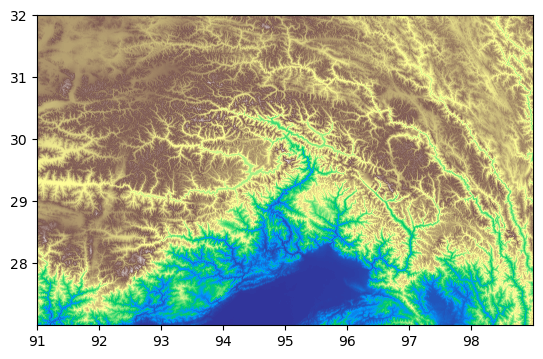

In [38]:
plt.subplot(1,1,1)
plt.imshow(dem_srtm, vmax=7000, vmin=0, extent=dem_srtm_info['geoextent'], cmap='terrain')


In [42]:
!gdal_merge.py -n -999 -a_nodata -999 -co COMPRESS=LZW -o 'dem_setp_2006' data/aster-stereo/SETP-2006/tiles-dem/*/dems_mosaic_subs.tif
!gdal_merge.py -n -999 -a_nodata -999 -co COMPRESS=LZW -o 'dem_setp_2007' data/aster-stereo/SETP-2007/tiles-dem/*/dems_mosaic_subs.tif
!gdal_merge.py -n -999 -a_nodata -999 -co COMPRESS=LZW -o 'dem_setp_2008' data/aster-stereo/SETP-2008/tiles-dem/*/dems_mosaic_subs.tif
!gdal_merge.py -n -999 -a_nodata -999 -co COMPRESS=LZW -o 'dem_setp_2009' data/aster-stereo/SETP-2009/tiles-dem/*/dems_mosaic_subs.tif


0...10...20...30...40...50...60...70...80...90...100 - done.


In [43]:
dem_2006, dem_2006_info = readTiff('dem_setp_2006')
dem_2007, dem_2007_info = readTiff('dem_setp_2007')
dem_2008, dem_2008_info = readTiff('dem_setp_2008')
dem_2009, dem_2009_info = readTiff('dem_setp_2009')
print(dem_2006.shape)


(17234, 24127)


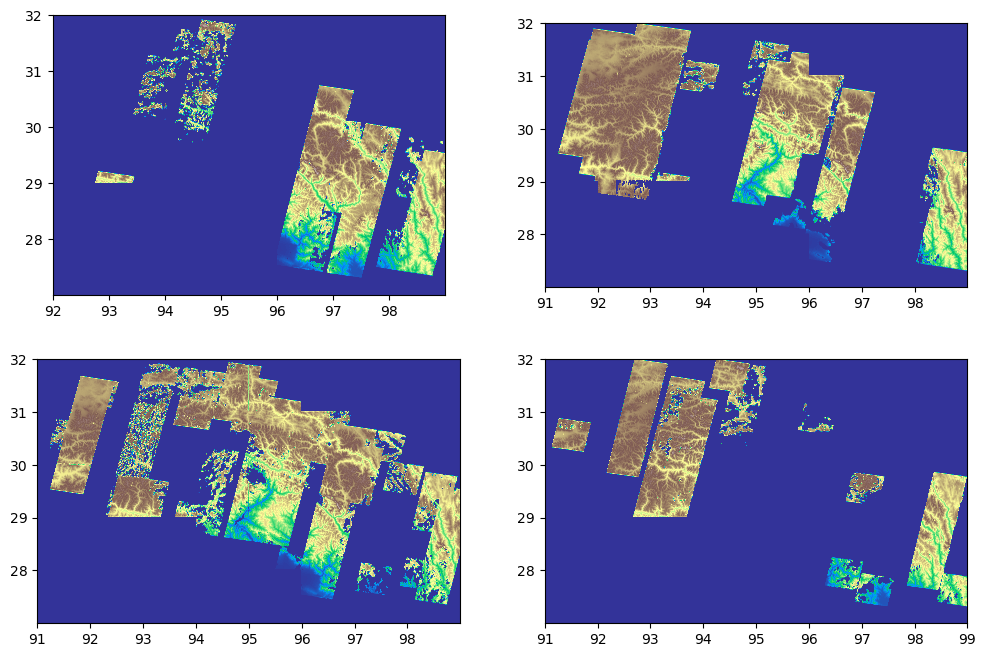

In [44]:
fig = plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.imshow(dem_2006, vmax=7000, vmin=1, extent=dem_2006_info['geoextent'], cmap='terrain')
plt.subplot(2,2,2)
plt.imshow(dem_2007, vmax=7000, vmin=1, extent=dem_2007_info['geoextent'], cmap='terrain')
plt.subplot(2,2,3)
plt.imshow(dem_2008, vmax=7000, vmin=1, extent=dem_2008_info['geoextent'], cmap='terrain')
plt.subplot(2,2,4)
plt.imshow(dem_2009, vmax=7000, vmin=1, extent=dem_2009_info['geoextent'], cmap='terrain')


In [16]:
paths_img = glob('data/aster-stereo/SETP-2007/aster-dem/*/run-DEM_wgs84.tif')
len(paths_img)
paths_sel = imgs_in_extent(paths_img, extent=[92, 93, 28, 29])
paths_sel


['data/aster-stereo/SETP-2007/aster-dem/VNIR_2007.98341040/run-DEM_wgs84.tif',
 'data/aster-stereo/SETP-2007/aster-dem/VNIR_2007.85199267/run-DEM_wgs84.tif',
 'data/aster-stereo/SETP-2007/aster-dem/VNIR_2007.89579860/run-DEM_wgs84.tif',
 'data/aster-stereo/SETP-2007/aster-dem/VNIR_2007.80818763/run-DEM_wgs84.tif']

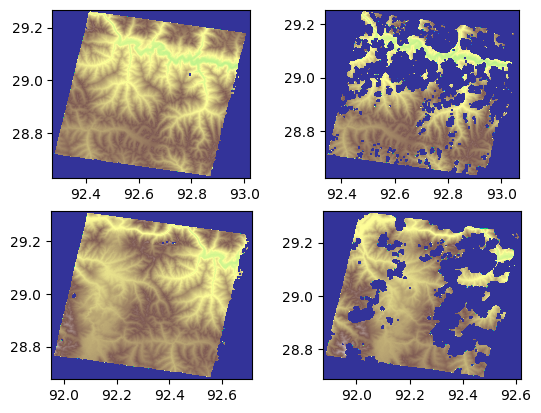

In [18]:
for i, path in enumerate(paths_sel):
  dem, dem_info = readTiff(path)
  plt.subplot(2,2,i+1)
  plt.imshow(dem, vmax=7000, vmin=1, extent=dem_info['geoextent'], cmap='terrain')
 

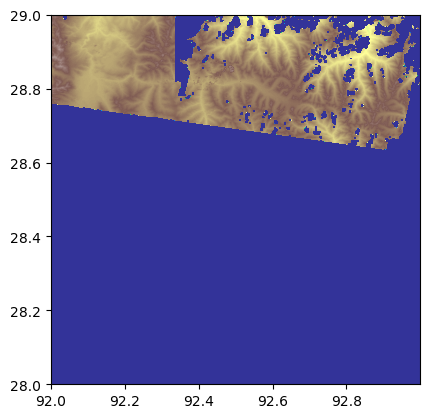

In [34]:
path_dem_tile='data/aster-stereo/SETP-2007/tiles-dem/tile-28-92/dems_mosaic_subs.tif'
dem_tile, dem_tile_info = readTiff(path_dem_tile)
# fig = plt.figure(figsize=(8,4))
plt.subplot(1,1,1)
plt.imshow(dem_tile, vmax=7000, vmin=1, extent=dem_tile_info['geoextent'], cmap='terrain')


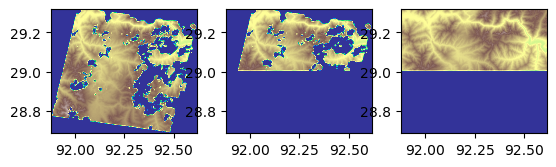

In [32]:
dem, dem_info = readTiff('data/aster-stereo/SETP-2007/aster-dem/VNIR_2007.80818763/run-DEM_wgs84.tif')
dem_filter, dem_filter_info = readTiff('data/aster-stereo/SETP-2007/aster-dem/VNIR_2007.80818763/run-DEM_wgs84_filter.tif')
srtm, srtm_info = readTiff('srtm_subs_tmp.tif')
# dem.shape
plt.subplot(1,3,1)
plt.imshow(dem, vmax=7000, vmin=1, extent=dem_info['geoextent'], cmap='terrain')
plt.subplot(1,3,2)
plt.imshow(dem_filter, vmax=7000, vmin=1, extent=dem_filter_info['geoextent'], cmap='terrain')
plt.subplot(1,3,3)
plt.imshow(srtm, vmax=7000, vmin=1, extent=srtm_info['geoextent'], cmap='terrain')



In [31]:
srtm, srtm_info = readTiff('data/aster-stereo/SETP-2007/aster-dem/VNIR_2007.80818763/run-DEM_wgs84.tif')




array([[-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       ...,
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.]], dtype=float32)